In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /home/pedrox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedrox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df['ncm'] = df['ncm'].astype(str).str[:2]
df = df.drop(columns=['Unnamed: 0'])
df.drop(df.loc[df['ncm'] == '00'].index, inplace=True)
df = df.dropna()

/home/pedrox/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
import pandas as pd
df = pd.read_csv('./saida_oversample_2.csv',sep=',',dtype=str)
df = df.drop(columns=['Unnamed: 0'])

<AxesSubplot:xlabel='ncm'>

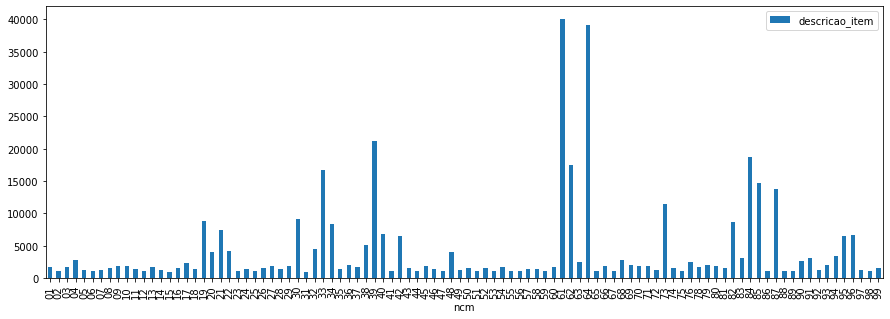

In [20]:
import matplotlib.pyplot as plt
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))

In [22]:
over5000 = []
median = []
less1000 = []


for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [23]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 19
entre 5000 e 1000 79
abaixo de 1000 0


In [21]:
from deep_translator import GoogleTranslator

for i in less1000:
    print(i)
    try:
        while len(df.loc[df['ncm'] == i]) < 1000:
            to_translate = list(df['descricao_item'].loc[df['ncm'] == i])
            translated_1 = GoogleTranslator(source='pt', target='en').translate_sentences(to_translate)
            print('segunda traducao')
            translated_2 = GoogleTranslator(source='en', target='pt').translate_sentences(translated_1)
            for desc in translated_2:
                new_row = {'descricao_item':desc, 'ncm':i}
                df = df.append(new_row, ignore_index=True)
    except:
        continue


<AxesSubplot:xlabel='ncm'>

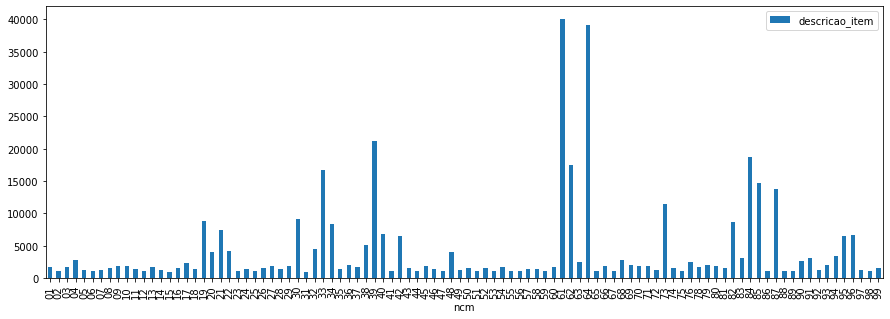

In [24]:
import matplotlib.pyplot as plt
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))

In [4]:
over5000 = []
median = []
less1000 = []


for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [5]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 19
entre 5000 e 1000 75
abaixo de 1000 4


In [10]:
#DROP menores que 1000
for i in less1000:
   df.drop(df.loc[df['ncm'] == i].index, inplace=True)

In [25]:
import pandas as pd
import numpy as np


for i in over5000: 
    remove_n = len(df.loc[df['ncm'] == i ]) - 5000
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    index_to_drop = df.index[df['ncm'] == remove_class][:remove_n]
    #Finally drop those indexes
    df = df.drop(index_to_drop)

In [26]:
df = df.reset_index()
df

,index,descricao_item,ncm
0,5,DISPLAY TOTEN PS MARLUVAS PES,49
1,16,OIL E7 15W GRANEL DEP,27
2,23,CS K BB CS TINTA 2L PRETA,32
3,48,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65
4,68,Livro IM Interativo Coreldraw x,49
...,...,...,...
230592,402630,HEAVY BLACK FABRIC,60
230593,402631,TERMINAL MASCULINO 11 16 X 3,60
230594,402632,LISO ROMA TULE EM P A BLACK MT,60
230595,402633,MODINHA DRESS REF 110 A,60


In [27]:
df = df.drop(columns=['index'])

Text(0, 0.5, 'Produtos divididos em capítulos de NCM')

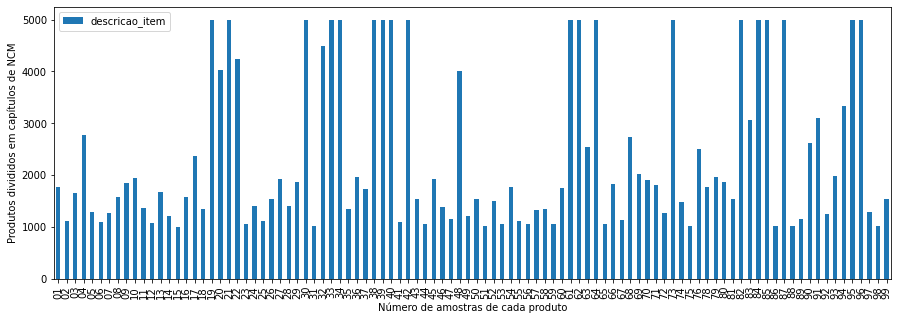

In [28]:
df_group_nw = df.groupby('ncm').count()
df_group_nw
df_group_nw.plot.bar( figsize=(15, 5))
plt.xlabel("Número de amostras de cada produto")
plt.ylabel("Produtos divididos em capítulos de NCM")

In [29]:
df.dropna()

,descricao_item,ncm
0,DISPLAY TOTEN PS MARLUVAS PES,49
1,OIL E7 15W GRANEL DEP,27
2,CS K BB CS TINTA 2L PRETA,32
3,KIT DE PROTECAO INFANTIL CAPITAO ESTRELA TAM...,65
4,Livro IM Interativo Coreldraw x,49
...,...,...
230592,HEAVY BLACK FABRIC,60
230593,TERMINAL MASCULINO 11 16 X 3,60
230594,LISO ROMA TULE EM P A BLACK MT,60
230595,MODINHA DRESS REF 110 A,60


In [32]:
palavras_final = []
for i in range(len(df['descricao_item'])): 
    produto = df['descricao_item'].iloc[i]
    sentencas = nltk.sent_tokenize(produto)
    palavras = nltk.word_tokenize(produto.upper())
    stemmer = nltk.stem.RSLPStemmer()
    palavras_stem = []
    for palavra in palavras:
        palavras_stem.append(stemmer.stem(palavra))
    palavras_sem_stopwords = [palavras_stem for palavras_stem in palavras_stem if palavras_stem not in stopwords and len(palavras_stem) > 1]
    palavra_final = ' '.join(palavras_sem_stopwords)
    palavras_final.append(palavra_final)
x = pd.Series(palavras_final)
df['descricao_item_clean'] = x

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['ncm']
text = df['descricao_item_clean']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=123, test_size=0.2)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

#labels_enc = LabelEncoder()
#y_train_labels_fit = labels_enc.fit(y_train)
#y_train_lables_trf = labels_enc.transform(y_train)

#print(labels.classes_)

In [34]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train)

In [38]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf.predict(p_tfidf)
y_pred = y_pred.astype(int)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.95      0.95       386
           2       0.90      0.91      0.90       212
           3       0.94      0.95      0.95       339
           4       0.91      0.91      0.91       553
           5       0.87      0.95      0.91       263
           6       0.97      1.00      0.98       233
           7       0.82      0.84      0.83       245
           8       0.89      0.92      0.91       333
           9       0.89      0.94      0.92       376
          10       0.96      0.95      0.96       384
          11       0.90      0.92      0.91       259
          12       0.86      0.83      0.84       236
          13       0.99      0.99      0.99       316
          14       0.98      0.91      0.94       227
          15       0.84      0.63      0.72       220
          16       0.91      0.93      0.92       338
          17       0.90      0.91      0.90       463
          18       0.85    

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0)
clf_logistic_regression = logistic_regression.fit(X_train_transformed,y_train)

/home/pedrox/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf_logistic_regression.predict(p_tfidf)
y_pred = y_pred.astype(int)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       386
           2       0.89      0.87      0.88       212
           3       0.94      0.91      0.93       339
           4       0.92      0.90      0.91       553
           5       0.98      0.84      0.91       263
           6       0.97      0.98      0.98       233
           7       0.82      0.80      0.81       245
           8       0.87      0.88      0.88       333
           9       0.87      0.91      0.89       376
          10       0.96      0.94      0.95       384
          11       0.87      0.89      0.88       259
          12       0.85      0.76      0.80       236
          13       1.00      0.99      1.00       316
          14       0.81      0.97      0.88       227
          15       0.92      0.61      0.73       220
          16       0.91      0.92      0.92       338
          17       0.86      0.88      0.87       463
          18       0.84    

In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
clf_random_forest = random_forest.fit(X_train_transformed,y_train)

In [40]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf_random_forest.predict(p_tfidf)
y_pred = y_pred.astype(int)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       386
           2       0.00      0.00      0.00       212
           3       0.00      0.00      0.00       339
           4       1.00      0.00      0.00       553
           5       0.00      0.00      0.00       263
           6       0.00      0.00      0.00       233
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00       333
           9       0.00      0.00      0.00       376
          10       1.00      0.20      0.33       384
          11       0.00      0.00      0.00       259
          12       0.00      0.00      0.00       236
          13       1.00      0.28      0.44       316
          14       0.00      0.00      0.00       227
          15       0.00      0.00      0.00       220
          16       0.00      0.00      0.00       338
          17       0.00      0.00      0.00       463
          18       0.00    

/home/pedrox/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedrox/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedrox/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
clf_naive_bayes = naive_bayes.fit(X_train_transformed,y_train)

In [43]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf_naive_bayes.predict(p_tfidf)
y_pred = y_pred.astype(int)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.74      0.84       386
           2       0.94      0.74      0.83       212
           3       0.99      0.74      0.85       339
           4       0.91      0.87      0.89       553
           5       0.97      0.79      0.87       263
           6       0.97      0.98      0.98       233
           7       0.80      0.45      0.58       245
           8       0.92      0.66      0.77       333
           9       0.89      0.77      0.83       376
          10       0.92      0.85      0.88       384
          11       0.87      0.72      0.79       259
          12       0.88      0.44      0.59       236
          13       1.00      0.83      0.91       316
          14       0.80      0.90      0.85       227
          15       0.96      0.33      0.49       220
          16       0.90      0.89      0.90       338
          17       0.84      0.84      0.84       463
          18       0.82    